<a href="https://colab.research.google.com/github/2303A52183/2303A52183_AIML/blob/main/aiml_ass_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT - 6
HT.NO.:2303A52183

BATCH 34

# K-Nearest Neighbor Classification
Import packages and data set

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/nvidia_stock_data.csv",sep=',', index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000
2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000
2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000
2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000
2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 2023-01-03 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       437 non-null    float64
 1   High       437 non-null    float64
 2   Low        437 non-null    float64
 3   Close      437 non-null    float64
 4   Adj Close  437 non-null    float64
 5   Volume     437 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.9+ KB


In [92]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,62.618792,63.795366,61.340346,62.635151,62.621695,4.554760e+08
std,34.893995,35.606990,33.951698,34.782847,34.783928,1.582334e+08
min,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08
25%,40.097000,40.500000,39.057999,39.770000,39.750576,3.610260e+08
50%,47.500000,48.230000,46.742001,47.506001,47.495808,4.277170e+08
75%,90.000000,91.300003,88.400002,90.356003,90.340851,5.136480e+08
max,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09


# Check the spread of the features

In [93]:
l=list(df.columns)
l[0:len(l)-2]

['Open', 'High', 'Low', 'Close']

**Run a 'for' loop to draw boxlots of all the features for '0' and '1' TARGET CLASSt**

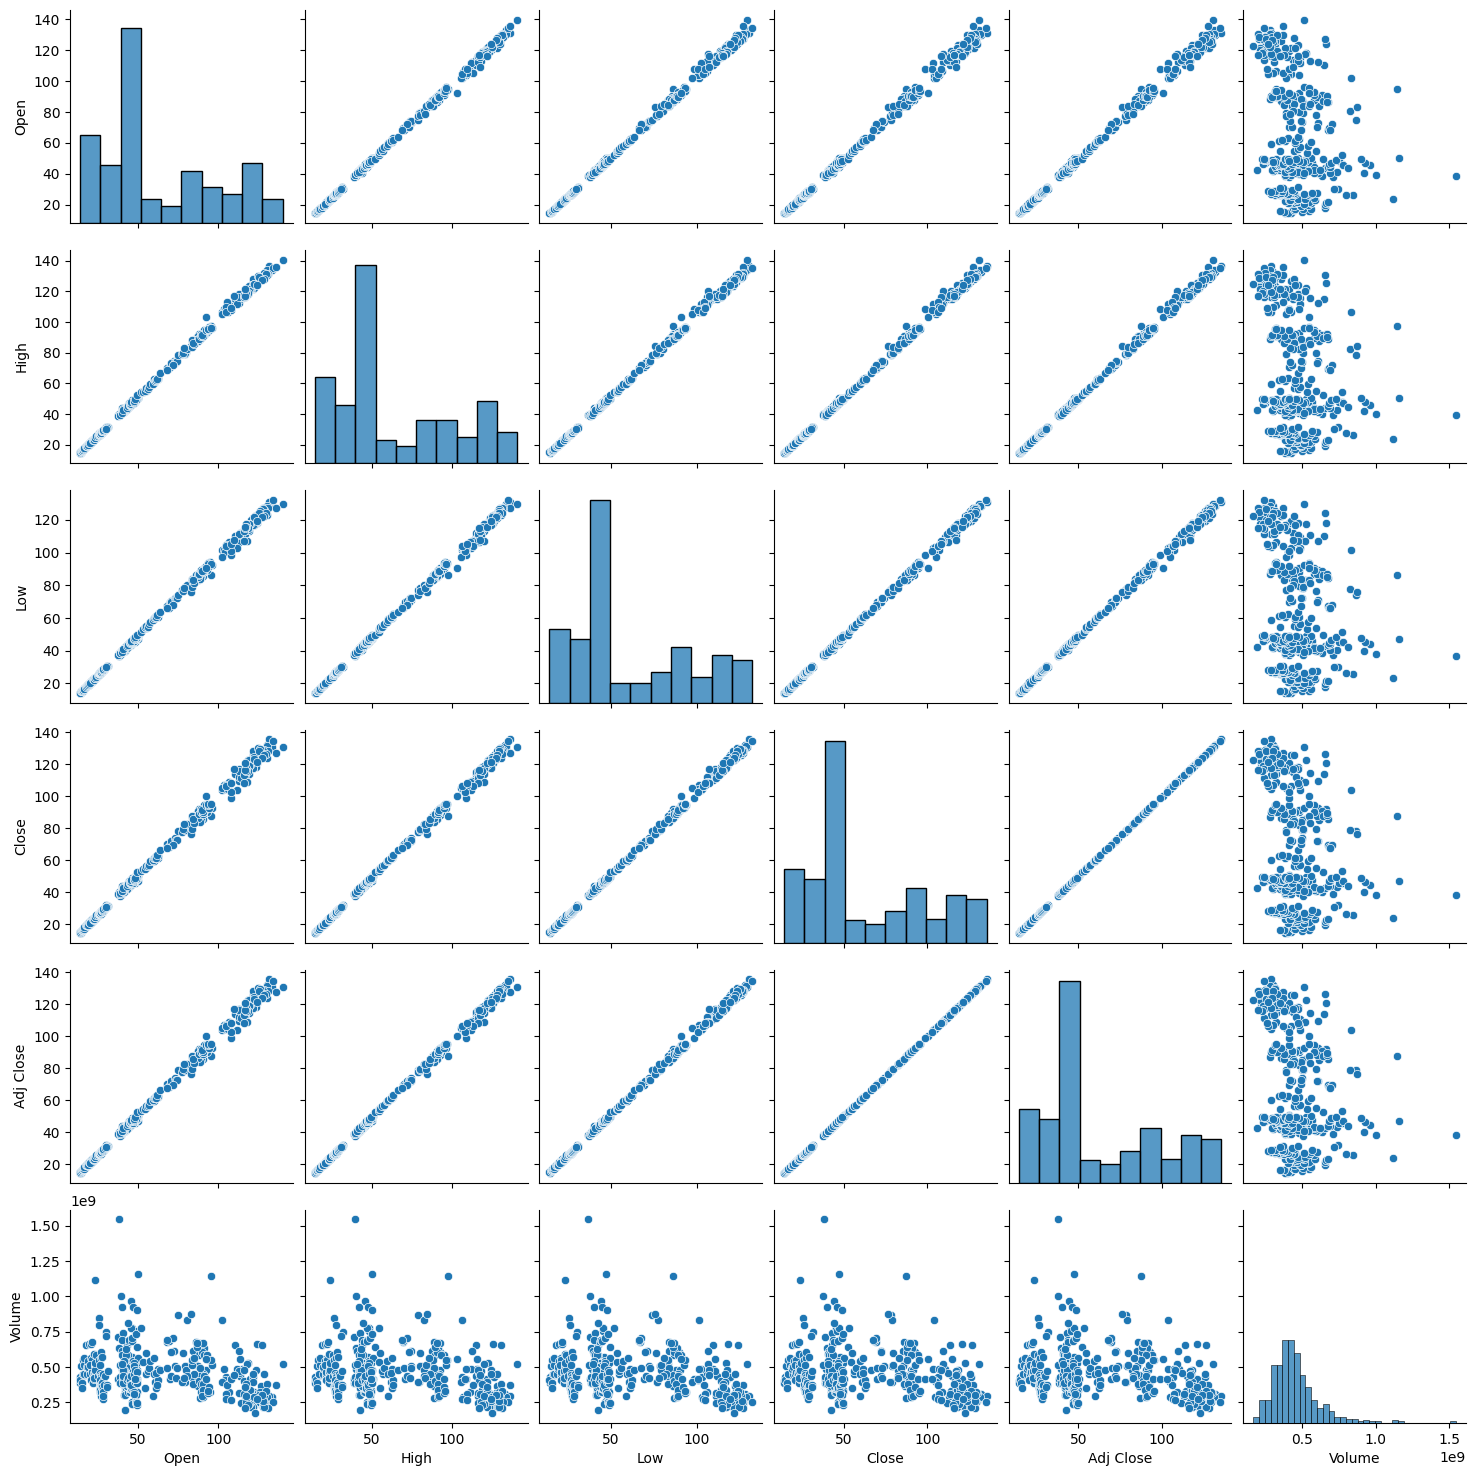

In [94]:
sns.pairplot(df)

# Identify the Target Classes from the Dataset and their Counts

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


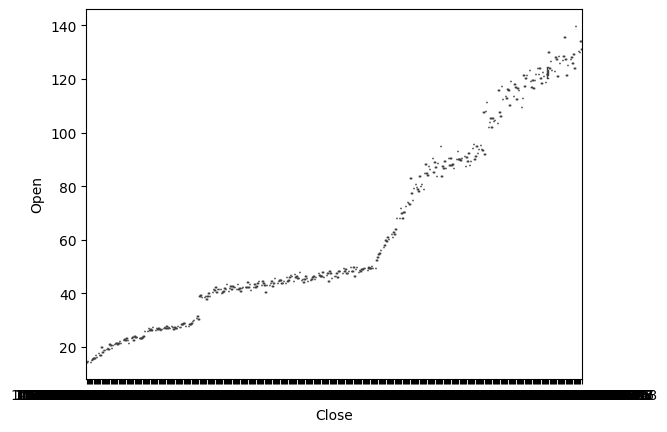

<Figure size 640x480 with 0 Axes>

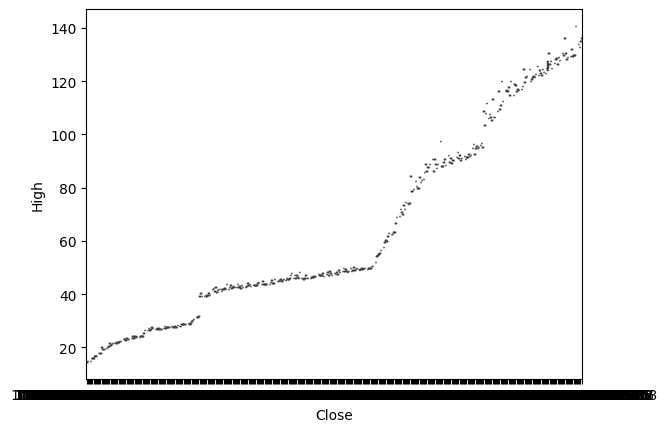

<Figure size 640x480 with 0 Axes>

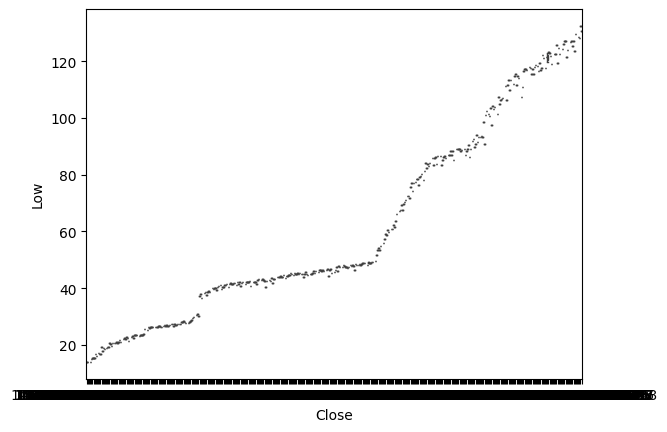

<Figure size 640x480 with 0 Axes>

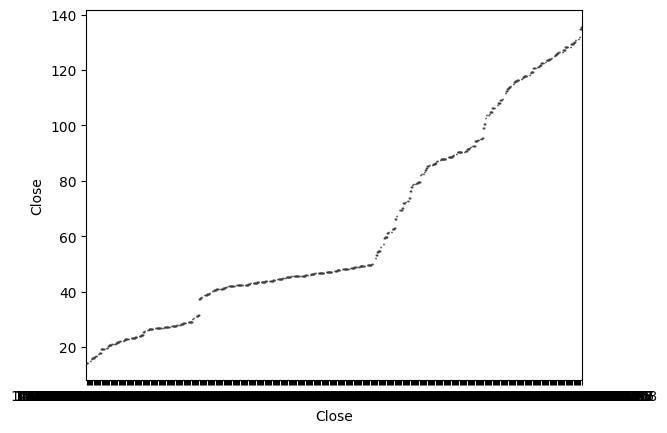

<Figure size 640x480 with 0 Axes>

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

l = list(df.columns)
l = l[0:len(l)-2]

target_class_column =  'Close'

print(df.columns)

for i in range(len(l)):
    sns.boxplot(x=target_class_column, y=l[i], data=df)
    plt.figure()
    plt.show()

# Scale the features using sklearn.preprocessing package
Instantiate a scaler standardizing estimator

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
scaler.fit(df.drop('Adj Close',axis=1))
scaled_features = scaler.transform(df.drop('Adj Close',axis=1))

In [98]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Open,High,Low,Close,Adj Close
0,-1.370509,-1.372070,-1.393111,-1.390787,-0.342918
1,-1.378657,-1.376091,-1.388836,-1.378295,-0.152810
2,-1.380838,-1.384217,-1.391578,-1.392226,-0.419532
3,-1.381326,-1.371677,-1.394940,-1.375129,-0.319084
4,-1.358086,-1.342267,-1.362297,-1.352995,0.308474


In [99]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Adj Close'],
                 test_size=0.30, random_state=101)

In [101]:
print(y_train.unique())

[ 61.34883499  40.31380463  41.1011734   17.69035339  43.92308807
  43.28233719  87.99324799  41.3744812   19.78897095  23.87428284
  54.81023788  79.0750351   46.22701263  57.09474945  78.68411255
 120.86773682  72.64240265  49.40639496  26.74493599  88.77411652
  45.39952087  42.98045731  88.94908142  28.32616234 121.07963562
 118.06990051  26.94283676  42.39667892  56.36990356 125.81923676
  27.36963081 123.5294342  122.41947174  66.14580536  47.47572327
  45.56721878  87.72029114  48.1254425  120.87000275  85.89059448
  87.40034485 120.8996582   22.95588493 134.89846802  45.73716354
  46.94892883 131.86872864  45.55821609  90.87276459  20.64141083
  48.87950897  27.09076881  49.59335709 129.59890747  46.58600235
  47.76155472  46.75085449  43.49283981  20.92922211  40.61636353
  40.48775101  42.48663712  47.64677429  46.00028992  87.51332855
  47.05888748  85.33968353  27.78842545  43.50383377  79.09502411
  41.76636124  85.94958496  63.01347733 119.13999939  76.18722534
  42.20922

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
})
y = pd.Series([0, 1, 0, 1, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_mat)

print("\nClassification Report:\n", classification_report(y_test, pred))


Confusion Matrix:
 [[0 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [105]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 1.0


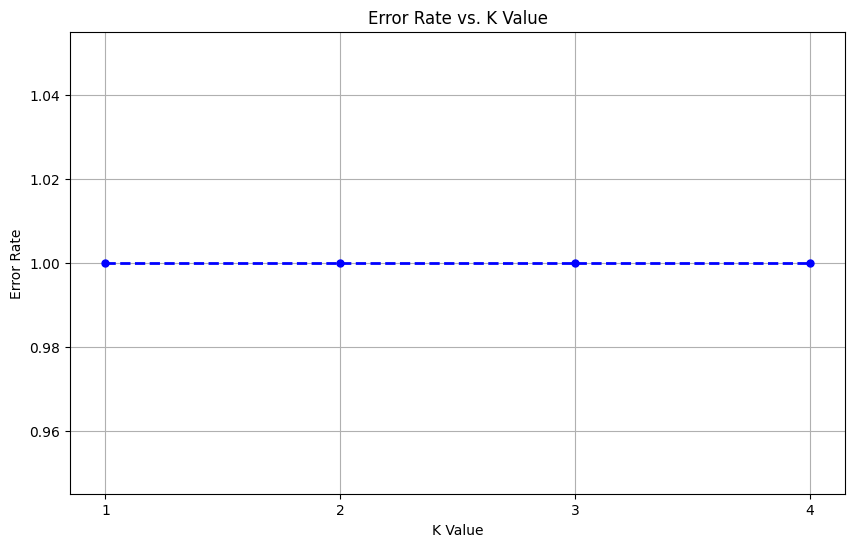

In [106]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
n_samples_train = X_train.shape[0]
for i in range(1, n_samples_train + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_samples_train + 1), error_rate, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, n_samples_train + 1))  # Set x-ticks to range of K values
plt.grid()
plt.show()
